# Simple CNN model for CIFAR-10


In [2]:
# import the keras tensorflow libraries
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import *
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

#load data

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Normalize inputs from (0.0 - 255.0) to (0.0 - 1.0)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
print(X_train.shape)

(50000, 32, 32, 3)


# One hot encode labels

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
print(num_classes)

10


#Create the model

In [8]:
model = Sequential()

model.add(Conv2D(8, (3, 3), input_shape=(32,32, 3), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

## Question - 1 to create a sequential model with given structure

In [9]:
# question-1: created the sequential model as per given requirements
model1 = Sequential()
# created the input layer with 32 filters and 3*3 size
model1.add(Conv2D(32, (3, 3), input_shape=(32,32, 3), padding='same', activation='relu'))
model1.add(Dropout(0.2))
# created the input layer with 32 filters and 3*3 size
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# created the input layer with 64 filters and 3*3 size
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(Dropout(0.2))
# created the input layer with 64 filters and 3*3 size
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# created the input layer with 128 filters and 3*3 size
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Dropout(0.2))
# created the input layer with 128 filters and 3*3 size
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# converted to single array
model1.add(Flatten())
model1.add(Dropout(0.2))
# created neurons of 1024 in hidden layer
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.2))
# created neurons of 512 in hidden layer
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))




## Question 2: to convert above model into keras functionalAPI model

In [10]:
visible = Input(shape=(32,32,3))
# created the input layer with 32 filters and 3*3 size
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(visible)
drop1 = Dropout(0.2)(conv1)
# created the input layer with 32 filters and 3*3 size
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(drop1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
# created the input layer with 32 filters and 3*3 size
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
drop2 = Dropout(0.2)(conv3)
# created the input layer with 32 filters and 3*3 size
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(drop2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv4)
# created the input layer with 32 filters and 3*3 size
conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
drop3 = Dropout(0.2)(conv5)
# created the input layer with 32 filters and 3*3 size
conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(drop3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv6)

flat = Flatten()(pool2)
drop4 = Dropout(0.2)(flat)
#created the 1024 neurons in a layer
hidden1 = Dense(1024, activation='relu')(drop4)
drop5 = Dropout(0.2)(hidden1)
#created the 512 neurons in a layer
hidden2 = Dense(512, activation='relu')(drop5)
drop5 = Dropout(0.2)(hidden2)

output = Dense(num_classes, activation='softmax')(drop5)

modelseq = Model(inputs=visible, outputs=output)

#Compile model

In [11]:
epochs = 10
lrate = 0.001
adam = tf.keras.optimizers.Adam(learning_rate=lrate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [12]:
epochs = 10
lrate = 0.001
adam = tf.keras.optimizers.Adam(learning_rate=lrate)
# compiled the model with loss function
model1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [13]:
epochs = 10
lrate = 0.001
adam = tf.keras.optimizers.Adam(learning_rate=lrate)
# compiled the model with loss function
modelseq.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

In [15]:
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [16]:
print(modelseq.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)        0     

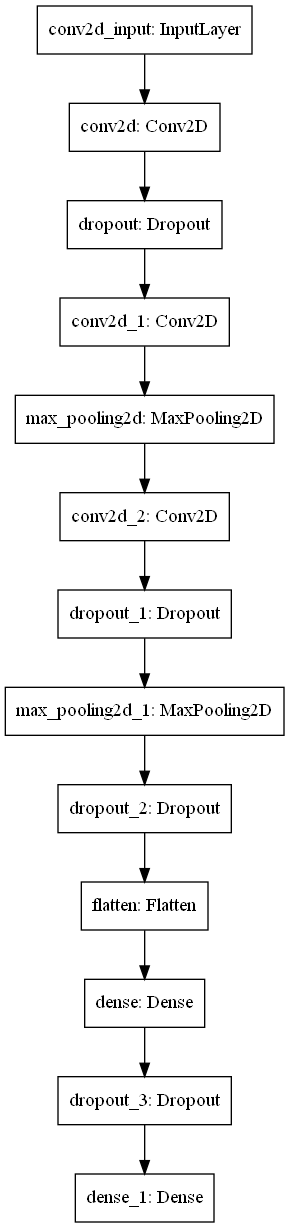

In [17]:
# plotted the model structure
from keras.utils.vis_utils import plot_model
plot_model(model)

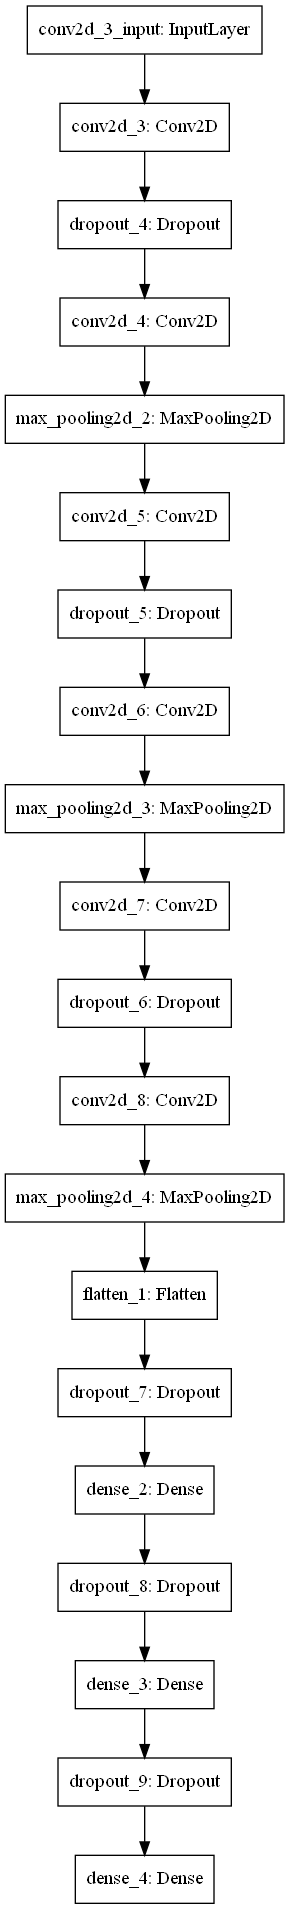

In [18]:
from keras.utils.vis_utils import plot_model
# plotted the model structure
plot_model(model1)

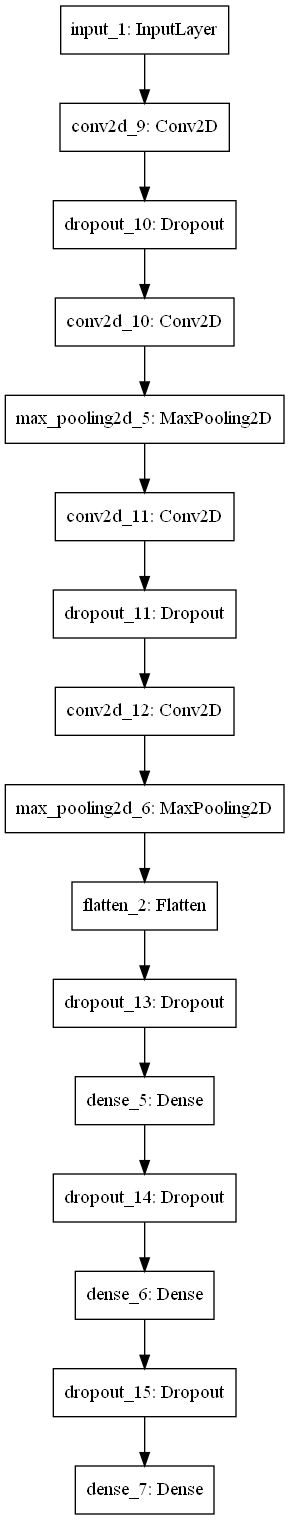

In [19]:
from keras.utils.vis_utils import plot_model
# plotted the model structure
plot_model(modelseq)

#Fit the model

In [20]:
# trained the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=1)

Epoch 1/10
391/391 [==============================] - 31s 77ms/step - loss: 1.8302 - accuracy: 0.3305 - val_loss: 1.7506 - val_accuracy: 0.4450
Epoch 2/10
391/391 [==============================] - 33s 85ms/step - loss: 1.5610 - accuracy: 0.4332 - val_loss: 1.6205 - val_accuracy: 0.4869
Epoch 3/10
391/391 [==============================] - 33s 85ms/step - loss: 1.4469 - accuracy: 0.4756 - val_loss: 1.4662 - val_accuracy: 0.5211
Epoch 4/10
391/391 [==============================] - 33s 85ms/step - loss: 1.3785 - accuracy: 0.5034 - val_loss: 1.4379 - val_accuracy: 0.5042
Epoch 5/10
391/391 [==============================] - 33s 85ms/step - loss: 1.3277 - accuracy: 0.5230 - val_loss: 1.3668 - val_accuracy: 0.5429
Epoch 6/10
391/391 [==============================] - 33s 85ms/step - loss: 1.2910 - accuracy: 0.5367 - val_loss: 1.3659 - val_accuracy: 0.5356
Epoch 7/10
391/391 [==============================] - 33s 85ms/step - loss: 1.2544 - accuracy: 0.5520 - val_loss: 1.2965 - val_accuracy:

In [21]:
# trained and evaluated the model with train and test data
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=1)

Epoch 1/10
391/391 [==============================] - 138s 353ms/step - loss: 1.7086 - accuracy: 0.3669 - val_loss: 1.4785 - val_accuracy: 0.4677
Epoch 2/10
391/391 [==============================] - 132s 337ms/step - loss: 1.2133 - accuracy: 0.5650 - val_loss: 1.1526 - val_accuracy: 0.5907
Epoch 3/10
391/391 [==============================] - 137s 349ms/step - loss: 0.9954 - accuracy: 0.6473 - val_loss: 0.9351 - val_accuracy: 0.6654
Epoch 4/10
391/391 [==============================] - 144s 368ms/step - loss: 0.8585 - accuracy: 0.6961 - val_loss: 0.8138 - val_accuracy: 0.7162
Epoch 5/10
391/391 [==============================] - 137s 351ms/step - loss: 0.7687 - accuracy: 0.7279 - val_loss: 0.7266 - val_accuracy: 0.7470
Epoch 6/10
391/391 [==============================] - 134s 343ms/step - loss: 0.6917 - accuracy: 0.7557 - val_loss: 0.7275 - val_accuracy: 0.7498
Epoch 7/10
391/391 [==============================] - 133s 340ms/step - loss: 0.6274 - accuracy: 0.7791 - val_loss: 0.6779 -

#Model evaluation

In [22]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 53.47%


In [23]:
scores1 = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores1[1]*100))

Accuracy: 78.60%


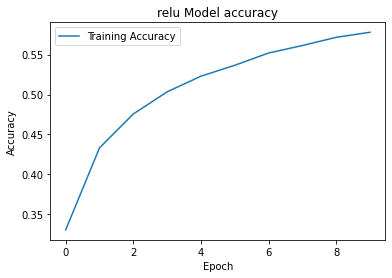

In [25]:
# plotted question model accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('relu Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy'], loc='upper left')
plt.show()

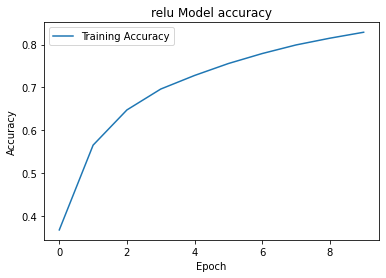

In [26]:
# plotted Question 1 model accuracy
plt.plot(history1.history['accuracy'])
plt.title('relu Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy'], loc='upper left')
plt.show()

## question2.1: Apply the following callbacks to the model:
 - ModelCheckPoint.
 - EarlyStopping

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint_path = 'vineethseq.h5'
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=1, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]

In [30]:
historyseq = modelseq.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=1, callbacks = keras_callbacks)

Epoch 1/10
391/391 [==============================] - 115s 292ms/step - loss: 1.5752 - accuracy: 0.4222 - val_loss: 1.2321 - val_accuracy: 0.5544
Epoch 2/10
391/391 [==============================] - 115s 294ms/step - loss: 1.1336 - accuracy: 0.5953 - val_loss: 0.9980 - val_accuracy: 0.6459
Epoch 3/10
391/391 [==============================] - 128s 326ms/step - loss: 0.9085 - accuracy: 0.6758 - val_loss: 0.8560 - val_accuracy: 0.7027
Epoch 4/10
391/391 [==============================] - 114s 291ms/step - loss: 0.7744 - accuracy: 0.7256 - val_loss: 0.8380 - val_accuracy: 0.7076
Epoch 5/10
391/391 [==============================] - 112s 287ms/step - loss: 0.6587 - accuracy: 0.7678 - val_loss: 0.7833 - val_accuracy: 0.7307
Epoch 6/10
391/391 [==============================] - 118s 302ms/step - loss: 0.5689 - accuracy: 0.7981 - val_loss: 0.7346 - val_accuracy: 0.7529
Epoch 7/10
391/391 [==============================] - 121s 310ms/step - loss: 0.4867 - accuracy: 0.8290 - val_loss: 0.7279 -

In [31]:
scores2 = modelseq.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores2[1]*100))

Accuracy: 76.22%


## question 3 - plot the images and predict the images

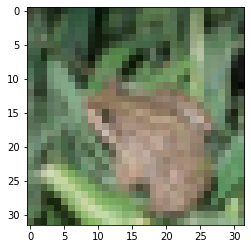

In [35]:

import matplotlib.pyplot as plt
plt.imshow(X_test[0])


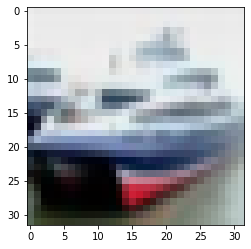

In [36]:
plt.imshow(X_test[1])


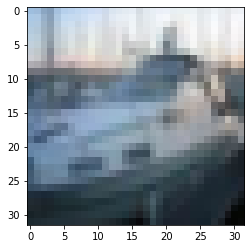

In [37]:
plt.imshow(X_test[2])


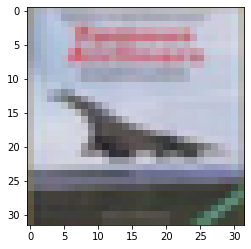

In [38]:
plt.imshow(X_test[3])


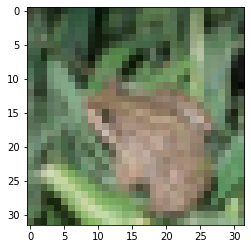

In [39]:
plt.imshow(X_test[4])

In [6]:
from tensorflow.keras.models import Sequential, save_model, load_model
samples_to_predict = X_test[0:5]
checkpoint_path = 'vineethseq.h5'
# loaded the saved model
loadedmodel = load_model(checkpoint_path, compile = True)
# predict the model
predictions = loadedmodel.predict(samples_to_predict)
print(predictions)
import numpy as np
classes = np.argmax(predictions, axis = 1)
print(classes)
outputs=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog','horse','ship','truck']
print('------------------------------------------')
for cat in classes:
    print(outputs[cat])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8 1 9 0 3]
------------------------------------------
ship
automobile
truck
airplane
cat
